Libraries

In [1]:
import pandas as pd
import numpy as np
import os
curr_dir = os.getcwd()
import sys
import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_lo

AttributeError: _ARRAY_API not found

Inputs

In [2]:
data_path = os.path.join(curr_dir, '../Data')

input_path = os.path.join(data_path, '/Input')
interim_path = os.path.join(data_path, '/Intermediate')
output_path = os.path.join(data_path, '/Output')

In [3]:
# %pip install --user --upgrade numpy

Preprocessing

Functions

In [9]:
# Full RSC Semantic Convergence + Syntax Emergence Experiment
# Author: Erich Curtis
# Date: 2025-04-28

import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# ------------------- 1. Vocabulary and Expanded Relations -------------------

semantic_fields = {
    "Living Things": ['dog', 'cat', 'horse', 'bird', 'deer', 'fox', 'shark', 'turtle', 'teacher', 'parent', 'child', 'friend', 'enemy'],
    "Actions": ['run', 'walk', 'swim', 'teach', 'learn', 'jump', 'help', 'hurt', 'love', 'eat', 'think', 'cook', 'write', 'speak', 'listen', 'plan'],
    "Objects": ['chair', 'table', 'cup', 'pen', 'phone', 'backpack', 'house', 'bridge', 'road', 'tree', 'bottle', 'knife', 'fork', 'window', 'bed'],
    "Locations": ['forest', 'mountain', 'river', 'valley', 'school', 'city', 'field', 'beach', 'island', 'cave', 'hill', 'continent', 'stadium', 'village'],
    "Quantities": ['one', 'two', 'few', 'many', 'all', 'none', 'some'],
    "Modifiers": ['big', 'small', 'fast', 'slow', 'loud', 'quiet', 'happy', 'sad', 'bright', 'dark'],
    "Prepositions": ['across', 'under', 'over', 'through', 'beside', 'near', 'around'],
    "Scientific": ['earth', 'sun', 'water', 'ice', 'orbit', 'gravity', 'star', 'cloud'],
    "Social": ['neighbor', 'stranger', 'friend', 'parent', 'enemy'],
    "Emotions": ['happy', 'sad', 'angry', 'tired', 'calm', 'excited', 'afraid', 'safe', 'proud', 'ashamed'],
    "Time Concepts": ['morning', 'afternoon', 'night', 'yesterday', 'today', 'tomorrow'],
    "Communication": ['speak', 'say', 'listen', 'ask', 'answer', 'name', 'introduce'],
    "Complex Social": ['my_name_is', 'he_is_my_friend', 'they_live_in_city'],
    "Conditions": ['if', 'when', 'because', 'while', 'although', 'unless']
}

# Flat vocabulary
vocab = list(set([item for sublist in semantic_fields.values() for item in sublist]))

# Relations - Simple, Medium, Complex, Conditional
relations = [
    ('dog', 'is', 'mammal'),
    ('car', 'moves_on', 'road'),
    ('bird', 'flies_over', 'river'),
    ('teacher', 'teaches', 'child'),
    ('rain', 'causes', 'wet_ground'),
    ('river', 'flows_into', 'lake'),
    ('phone', 'connects_to', 'internet'),
    ('earth', 'orbits', 'sun'),
    ('sun', 'provides', 'light'),
    ('friend', 'helps', 'friend'),
    ('child', 'plays_with', 'dog'),
    ('parent', 'loves', 'child'),
    ('earth', 'has', 'gravity'),
    ('water', 'freezes_at', '0C'),
    ('mountain', 'stands_over', 'valley'),
    ('wind', 'moves', 'clouds'),
    ('child', 'crosses', 'bridge', 'during rain'),
    ('friend', 'helps', 'friend', 'because of danger'),
    ('sun', 'rises', 'over mountain', 'at morning'),
    ('hunger', 'leads_to', 'eating'),
    ('fish', 'cannot', 'walk'),
    ('if rain', 'then', 'ground becomes wet'),
    ('teacher', 'speaks_to', 'student', 'in school'),
    ('cat', 'sleeps_on', 'bed'),
    ('dog', 'barks_at', 'stranger'),
    ('earthquake', 'shakes', 'city'),
    ('student', 'learns_from', 'teacher'),
    ('turtle', 'crawls_under', 'rock')
]

# ------------------- 2. Agent Initialization -------------------

random.seed(42)

agent_a_groundings = {word: word for word in vocab}
agent_b_groundings = {}
for word in vocab:
    if random.random() < 0.8:
        agent_b_groundings[word] = word
    else:
        agent_b_groundings[word] = random.choice(vocab)

agent_c_groundings = {}
for word in vocab:
    if random.random() < 0.3:
        agent_c_groundings[word] = word
    else:
        agent_c_groundings[word] = random.choice(vocab)

# ------------------- 3. Learning Phase with RSC Stability -------------------

total_frames = 1500
batch_size = 3

proposals_log_ab = []
proposals_log_ac = []
anchor_log_ab = []
anchor_log_ac = []
accepted_relations_ab = set()
accepted_relations_ac = set()
stability_counter_ab = {}
stability_counter_ac = {}
anchors_ab = set()
anchors_ac = set()
accuracy_over_time_ab = []
accuracy_over_time_ac = []

stability_threshold = 3

# Ground truth set for validation
ground_truth_set = set(relations)

def validate_relation(*args):
    return args in ground_truth_set

def try_validate(groundings, *words):
    mapped = tuple([groundings[w] if w in groundings else w for w in words])
    return validate_relation(*mapped)

# Learning Loop
for frame in tqdm(range(total_frames), desc="Learning Progress", unit="frame"):
    proposals = random.sample(relations, batch_size)
    accepted_ab = 0
    accepted_ac = 0

    for proposal in proposals:
        if try_validate(agent_b_groundings, *proposal):
            accepted_relations_ab.add(proposal)
            stability_counter_ab[proposal] = stability_counter_ab.get(proposal, 0) + 1
            accepted_ab += 1
            proposals_log_ab.append(f"Frame {frame}: {proposal} → ACCEPTED (A↔B)")
            if stability_counter_ab[proposal] == stability_threshold:
                anchors_ab.update(proposal)
                anchor_log_ab.append(f"Frame {frame}: ANCHORED {proposal}")
        else:
            proposals_log_ab.append(f"Frame {frame}: {proposal} → REJECTED (A↔B)")

        if try_validate(agent_c_groundings, *proposal):
            accepted_relations_ac.add(proposal)
            stability_counter_ac[proposal] = stability_counter_ac.get(proposal, 0) + 1
            accepted_ac += 1
            proposals_log_ac.append(f"Frame {frame}: {proposal} → ACCEPTED (A↔C)")
            if stability_counter_ac[proposal] == stability_threshold:
                anchors_ac.update(proposal)
                anchor_log_ac.append(f"Frame {frame}: ANCHORED {proposal}")
        else:
            proposals_log_ac.append(f"Frame {frame}: {proposal} → REJECTED (A↔C)")

    accuracy_over_time_ab.append(accepted_ab / batch_size)
    accuracy_over_time_ac.append(accepted_ac / batch_size)

    if frame % 25 == 0 and frame != 0:
        for word in random.sample(list(agent_c_groundings.keys()), 5):
            agent_c_groundings[word] = random.choice(vocab)

# ------------------- 4. Save Logs -------------------

with open('negotiation_log_ab.txt', 'w', encoding='utf-8') as f:
    for line in proposals_log_ab:
        f.write(line + '\n')

with open('negotiation_log_ac.txt', 'w', encoding='utf-8') as f:
    for line in proposals_log_ac:
        f.write(line + '\n')

with open('anchor_log_ab.txt', 'w', encoding='utf-8') as f:
    for line in anchor_log_ab:
        f.write(line + '\n')

with open('anchor_log_ac.txt', 'w', encoding='utf-8') as f:
    for line in anchor_log_ac:
        f.write(line + '\n')

print("All logs saved.")

Learning Progress: 100%|██████████| 1500/1500 [00:00<00:00, 124902.34frame/s]

All logs saved.


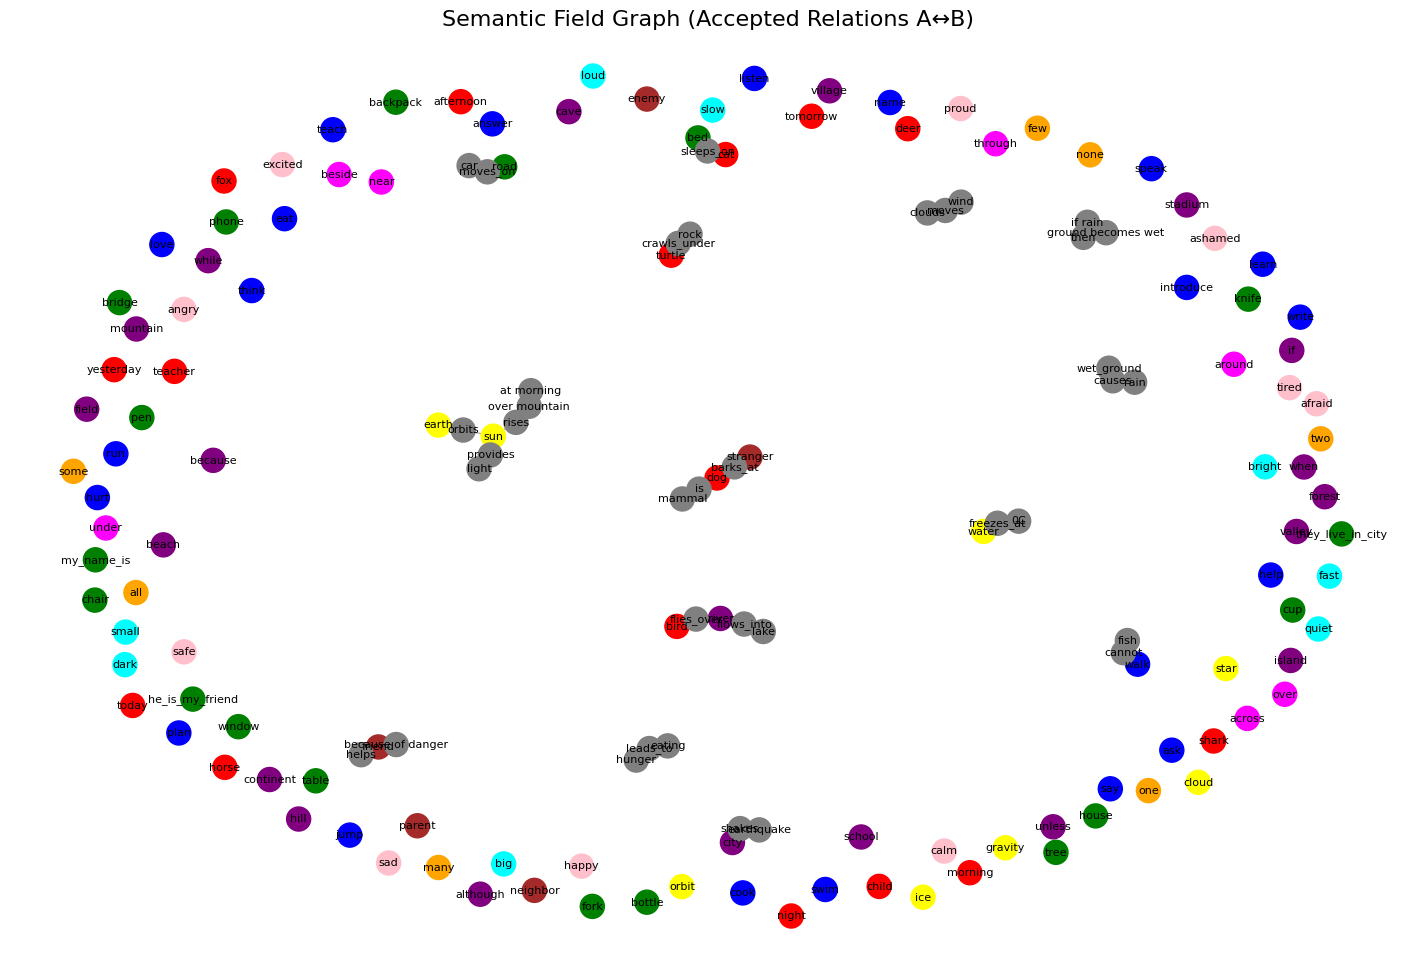

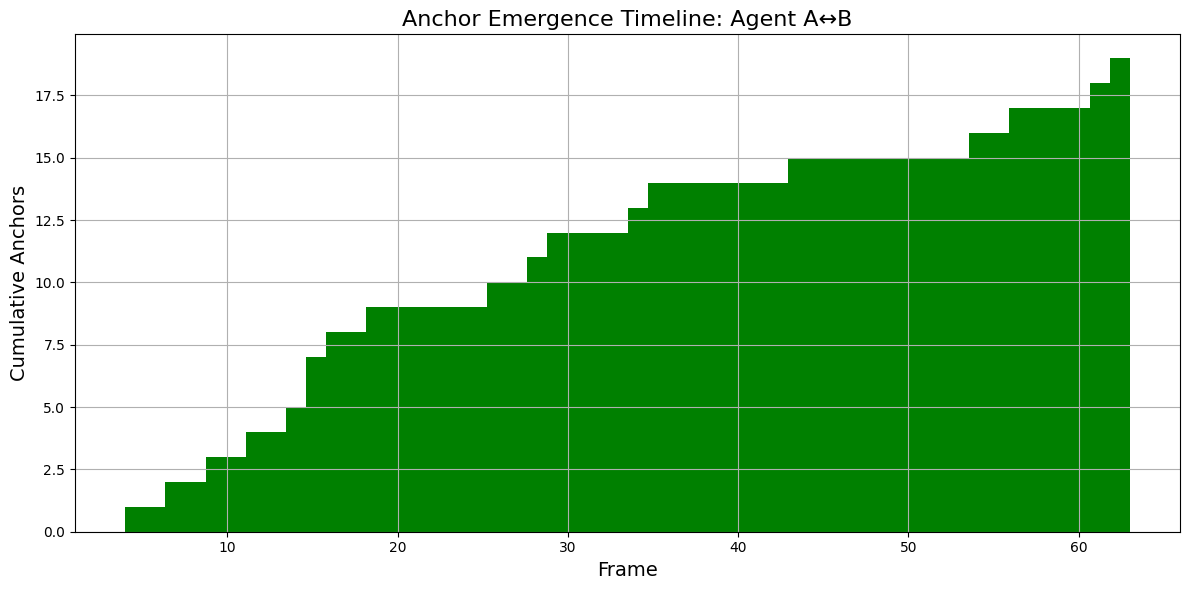

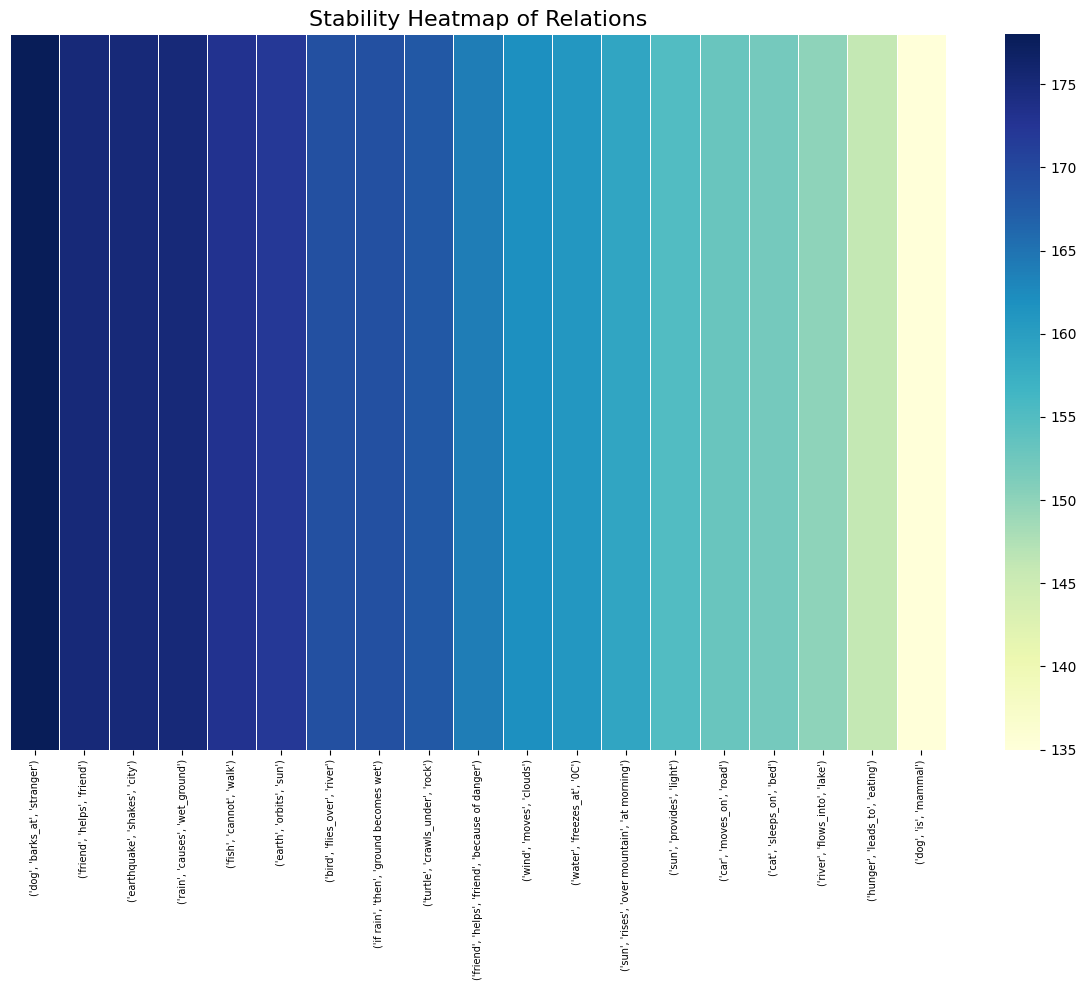

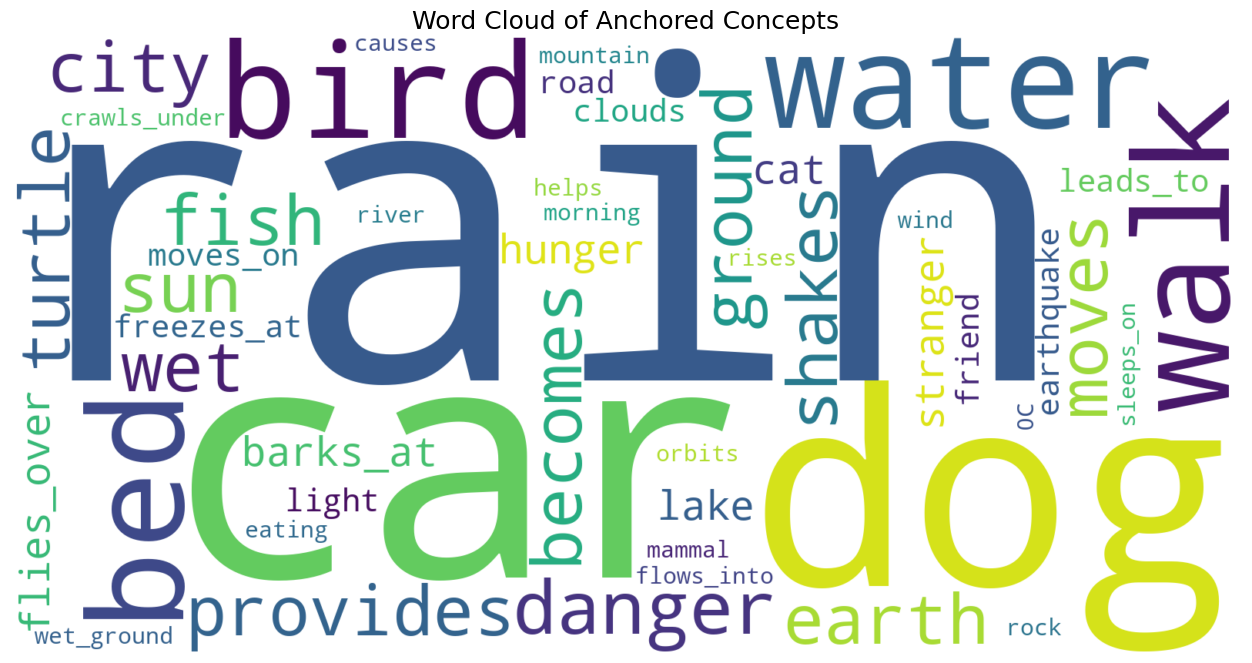

In [14]:
# RSC Visualizations Bundle
# Author: Erich Curtis
# Date: 2025-04-28

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

# Assume the following variables are already loaded from your main experiment:
# semantic_fields, accepted_relations_ab, anchors_ab, anchor_log_ab, stability_counter_ab

# ------------------- 1. Semantic Field Graph -------------------
def plot_semantic_field_graph():
    G_semantic = nx.Graph()
    color_palette = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    color_map = {}

    for idx, (field, words) in enumerate(semantic_fields.items()):
        for word in words:
            G_semantic.add_node(word, field=field)
            color_map[word] = color_palette[idx % len(color_palette)]

    for rel in accepted_relations_ab:
        for i in range(len(rel) - 1):
            G_semantic.add_edge(rel[i], rel[i+1])

    plt.figure(figsize=(18, 12))
    pos = nx.spring_layout(G_semantic, seed=42)
    nx.draw_networkx_nodes(G_semantic, pos, node_color=[color_map.get(n, 'gray') for n in G_semantic.nodes()], node_size=300)
    nx.draw_networkx_edges(G_semantic, pos, alpha=0.3)
    nx.draw_networkx_labels(G_semantic, pos, font_size=8)

    plt.title("Semantic Field Graph (Accepted Relations A↔B)", fontsize=16)
    plt.axis('off')
    plt.show()

# ------------------- 2. Syntax Emergence Graph -------------------
# Semantic Field Graph Visualization
def plot_semantic_field_graph():
    G_semantic = nx.Graph()
    color_palette = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    color_map = {}

    # Add nodes and assign colors based on semantic fields
    for idx, (field, words) in enumerate(semantic_fields.items()):
        for word in words:
            G_semantic.add_node(word, field=field)
            color_map[word] = color_palette[idx % len(color_palette)]

    # Add edges based on accepted relations
    for rel in accepted_relations_ab:
        for i in range(len(rel) - 1):
            G_semantic.add_edge(rel[i], rel[i + 1])

    # Plot the graph
    plt.figure(figsize=(18, 12))
    pos = nx.spring_layout(G_semantic, seed=42)

    # Assign a default color (e.g., 'gray') for nodes not in color_map
    default_color = 'gray'
    node_colors = [color_map.get(n, default_color) for n in G_semantic.nodes()]

    nx.draw_networkx_nodes(G_semantic, pos, node_color=node_colors, node_size=300)
    nx.draw_networkx_edges(G_semantic, pos, alpha=0.3)
    nx.draw_networkx_labels(G_semantic, pos, font_size=8)

    plt.title("Semantic Field Graph (Accepted Relations A↔B)", fontsize=16)
    plt.axis('off')
    plt.show()

# ------------------- 3. Anchor Timeline Plot -------------------
def plot_anchor_timeline():
    anchor_frames = [int(line.split()[1][:-1]) for line in anchor_log_ab]

    plt.figure(figsize=(12, 6))
    plt.hist(anchor_frames, bins=50, cumulative=True, color='green')
    plt.xlabel('Frame', fontsize=14)
    plt.ylabel('Cumulative Anchors', fontsize=14)
    plt.title('Anchor Emergence Timeline: Agent A↔B', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ------------------- 4. Stability Heatmap -------------------
def plot_stability_heatmap():
    relation_names = [str(rel) for rel in stability_counter_ab.keys()]
    validation_counts = [stability_counter_ab[rel] for rel in stability_counter_ab]

    df = pd.DataFrame({'Relation': relation_names, 'Validations': validation_counts})
    df = df.sort_values('Validations', ascending=False).reset_index(drop=True)

    plt.figure(figsize=(12, 10))
    sns.heatmap(df[['Validations']].T, cmap="YlGnBu", cbar=True, annot=False, linewidths=.5)
    plt.xticks(np.arange(len(df)) + 0.5, df['Relation'], rotation=90, fontsize=7)
    plt.yticks([])
    plt.title('Stability Heatmap of Relations', fontsize=16)
    plt.tight_layout()
    plt.show()

# ------------------- 5. Word Cloud of Anchors -------------------
def plot_wordcloud_of_anchors():
    anchor_words = list(anchors_ab)

    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(anchor_words))

    plt.figure(figsize=(18, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Anchored Concepts', fontsize=18)
    plt.show()

# ------------------- Main to Call All Visuals -------------------
if __name__ == "__main__":
    plot_semantic_field_graph()
    # plot_syntax_emergence_graph()
    plot_anchor_timeline()
    plot_stability_heatmap()
    plot_wordcloud_of_anchors()


End of Notebook